In [1]:
import sys

sys.path.append("..")

from common.utility import show_implementation
from module.utility import demonstrate_cipher

# Encryption
When we have a message that should only be read by certain users, we can employ encryption.
We convert the message (**plaintext**)  into a form that is not readable by anyone (**ciphertext**).
Then employ a mechanism for only the intended recipient to recover the plaintext from the ciphertext.

$$
  \text{Sender side: plaintext}\overset{encrypt}{\longrightarrow}\text{ciphertext} \\
  \text{Receiver side: ciphertext}\overset{decrypt}{\longrightarrow}\text{plaintext}
$$

Thus, an **encryption scheme/cipher** consists of two algorithms:
* **encryption**
    * Converts plaintext to ciphertext
* **decryption**
    * Converts ciphertext to plaintext
    
There are 2 requirements to a cipher:
* Correctness
    * For any plaintext, encrypting it then decrypting it will yield the original plaintext
    * Mathematically, it is defined as for any plaintext $x$ and key $k$, $D_k(E_k(x)) = x$
* Security
    * Given a ciphertext, it is difficult to derive useful information on the plaintext or key.
    * In other words, the ciphertext should look like a random sequence of bytes
    
Another typical requirement is that encryption/decryption can be efficiently performed.

## Use of Encryption
Suppose that Alice wishes to send a message to Bob such that no one else can view the content of the message.

1. Alice and Bob shares the encryption key. They either agree on a key beforehand, or Alice sends Bob the key through a **secure channel**
2. Alice encrypts her message using the key
3. Alice sends the encrypted message through an **insecure channel**
4. Bob receives the message through the insecure channel
5. Bob decrypts the message using the key

By the requirements of the cipher, any malicious entity (Eve) who intercepts the encrypted message is unable to derive the content of the message without knowledge of the key.
Since the key is not transmitted via an insecure channel, Eve is unable to view the content of the message.

## Cryptography
**Cryptography** is the study of methods in securing communication in the presence of adversaries who has access to the communication medium.
Even though encryption is commonly associated with cryptography, **it is only one of its facets**.
Other methods includes cryptographic hashes, digital signatures, etc.

**Key space**: The set of all possible keys

**Key space size**: The total number possible keys

**Key size/length**: The number of bits to represent a specific key

## Attacker's pre-knowledge
There are multiple models of the kind of resources about the cipher the attackers has access to.
### Ciphertext only
Attacker has access to large number of ciphertext that are **encrypted with the same key**
### Known plaintext
Attacker has access pairs of plaintext and its corresponding ciphertext.

At initial glance, it may seem unreasonable that an attacker is able to obtain some (if any) plaintext-ciphertext pairs.
However, many times, the first/last few bytes of a message can be reasonably guessed.

For example:
* Email data such as sender/receiver usually occurs in the header of the message
* Mails usually start with prefixes such as "Dear XXX", and usually end with "Regards" or "Yours sincerely".
* Some short template messages may be used during communication, such as "Noted with thanks" or "Nothing to report"

Thus, it is not unreasonable for attackers to have access to some plaintext-ciphertext pairs, even if it is for fragments of the full messages.

## Classical Ciphers
Classical ciphers are ciphers that have been used long ago.
We can study them for historical understanding of ciphers.
However, it is to note that most of these ciphers **are not secure in the "computer-era"**

### Substitution Ciphers

Key: A substitution table which gives a one-to-one correspondence between a character in the plaintext to a character in the ciphertext.

Key space size: $27! \approx 10^{28}$ 

Process: Each letter in the plaintext is substituted with the corresponding letter in the ciphertext, according the the substitution table.

It is a **monoalphabetic** cipher, meaning different occurences of the same letter in the plaintext is mapped to the same letter in the ciphertext.

In [2]:
from module.classical_cipher import SubstitutionCipher

show_implementation(SubstitutionCipher)

class SubstitutionCipher:
    def __init__(self, key):
        self.domain = ascii_lowercase + ' '
        assert len(key) == len(self.domain)
        self.key = key
        self.table = {a:b for a,b in zip(self.domain, key)}
        self.rtable = {b:a for a,b in zip(self.domain, key)}
    
    def __repr__(self):
        return f'Substitution Table:\n{self.domain}\n{self.key}'
    
    def encrypt(self, message):
        return ''.join(map(lambda x: self.table[x], message))
        
    def decrypt(self, message):
        return ''.join(map(lambda x: self.rtable[x], message))


In [3]:
key = "igtxzcquksln wahrbofpvemyjd"
plaintext = "hello world"
cipher = SubstitutionCipher(key)

demonstrate_cipher(cipher, plaintext)

Substitution Table:
abcdefghijklmnopqrstuvwxyz 
igtxzcquksln wahrbofpvemyjd

Plaintext:                          hello world
Ciphertext/Encrypted plaintext:     uznnadeabnx
Decrypted "uznnadeabnx":            hello world


#### Behaviours against attacks
##### Bruteforce attacks
Bruteforce attacks aims to iterate through all the possible keys in the keyspace until a message is produced.
Suppose that our cipher works on the domain of 27 characters, 26 letters + 1 whitespace.
The keyspace is size $27! > 10^{28}$.
This is rather infeasible approach to cracking the cipher due to the large keyspace.

##### Known plaintext attacks
Suppose that our attacker knows that `hello world` is encrypted to `uznnadeabnx` using our cipher.
This allows them to derive parts of our substitution table, such as $h \rightarrow u, e \rightarrow z, \dots$.
This means that given a large enough enough message, the attacker can derive our subsitution table (and thus our key) completely.

Hence, substitution ciphers are insecure under known plaintext attacks.

##### Ciphertext only attacks
###### Frequency Analysis
Notice that in English, certain letters appear more often than others, like how 'e' appears the most.
Secondly, realize that substitution ciphers do not change the relative frequencies of each character, since it is a one-to-one substitution.
Thus, the attacker can make the reasonable assumption that the mapping from the frequently-occurring letters in the plaintext to the frequently-occurring letters in the ciphertext is the key of the cipher.
And even if the resultant cipher is wrong, it will not be too far away from the actual cipher, such that the attacker can tweak their substitution table until their key produces a reasonable message.

Secondly, attackers can use the frequency of words to derive possible substitution for the cipher.
For example, 'I' and 'a' are frequently occurring 1 letter word, and 'the' is a frequently occurring 3 letter word.
If the attacker spots a 3 letter pattern that repeats throughout the ciphertext, they can assume that it likely corresponds to 'the' in the plaintext.

Now, we will run through the process of cracking a substitution cipher as an example of how it can be broken.

Suppose we have the following ciphertext that is encrypted with a substitution cipher, with space substituted also.

In [4]:
ciphertext = "qy omyhdeyxaoejynhe oejloecygnherqetyxxsegynne oeresrxjejloeqlsgkoqjejyynerxejloeqloheqloecsqenyyvrxtevrxheyuehw mecrjlelogeurxtogesxhelogejlw merxejloeqlskoeyuesxeneyxelogeuygolosheconnejloedosgqeqjsgjeay rxtesxhejlodehyxjeqjykeay rxteuohejyejloegwnoqesxherelrjejloetgywxhegwxxrxtehrhxje svoeqoxqoexyjejyenrpoeuygeuwxedywgemgsrxetojqeq sgjemwjedywgeloshetojqehw meqye walejyehyeqye walejyeqooeqyeclsjqecgyxtecrjlejsvrxtejloemsaveqjgoojqedywnnexopogevxyceruedywehyxjetyedywnnexopogeqlrxoeruedywehyxjetnycelodexycedywgoesxesnnqjsgetojedywgets oeyxetyeknsdelodexycedywgoesegyaveqjsgetojejloeqlyceyxetojeksrhesxhesnnejlsjetnrjjogqerqetynheyxndeqlyyjrxteqjsgqemgosvejloe ynherjqeseayyneknsaoesxhejlodeqsderjetojqeaynhogedywgoemwxhnohewkexycecsrjejrnedywetojeynhogemwjejloe ojoyge oxemotejyehruuogezwhtrxtemdejloelynoerxejloeqsjonnrjoekrajwgoejloeraoecoeqvsjoerqetojjrxtekgojjdejlrxejloecsjogqetojjrxtecsg eqyedywe rtljesqeconneqcr e decygnhqeyxeurgoelycesmywjedywgqejlsjqejloecsderenrvoerjesxhernnexopogetojemygohelodexycedywgoesxesnnqjsgetojedywgets oeyxetyeknsdelodexycedywgoesegyaveqjsgetojejloeqlyceyxetojeksrhesxhesnnejlsjetnrjjogqerqetynheyxndeqlyyjrxteqjsgqemgosvejloe ynhe"
print(ciphertext)

qy omyhdeyxaoejynhe oejloecygnherqetyxxsegynne oeresrxjejloeqlsgkoqjejyynerxejloeqloheqloecsqenyyvrxtevrxheyuehw mecrjlelogeurxtogesxhelogejlw merxejloeqlskoeyuesxeneyxelogeuygolosheconnejloedosgqeqjsgjeay rxtesxhejlodehyxjeqjykeay rxteuohejyejloegwnoqesxherelrjejloetgywxhegwxxrxtehrhxje svoeqoxqoexyjejyenrpoeuygeuwxedywgemgsrxetojqeq sgjemwjedywgeloshetojqehw meqye walejyehyeqye walejyeqooeqyeclsjqecgyxtecrjlejsvrxtejloemsaveqjgoojqedywnnexopogevxyceruedywehyxjetyedywnnexopogeqlrxoeruedywehyxjetnycelodexycedywgoesxesnnqjsgetojedywgets oeyxetyeknsdelodexycedywgoesegyaveqjsgetojejloeqlyceyxetojeksrhesxhesnnejlsjetnrjjogqerqetynheyxndeqlyyjrxteqjsgqemgosvejloe ynherjqeseayyneknsaoesxhejlodeqsderjetojqeaynhogedywgoemwxhnohewkexycecsrjejrnedywetojeynhogemwjejloe ojoyge oxemotejyehruuogezwhtrxtemdejloelynoerxejloeqsjonnrjoekrajwgoejloeraoecoeqvsjoerqetojjrxtekgojjdejlrxejloecsjogqetojjrxtecsg eqyedywe rtljesqeconneqcr e decygnhqeyxeurgoelycesmywjedywgqejlsjqejloecsderenrvoerjesxhernnexopoge

First, we can look at the frequency of the letters in the ciphertext.

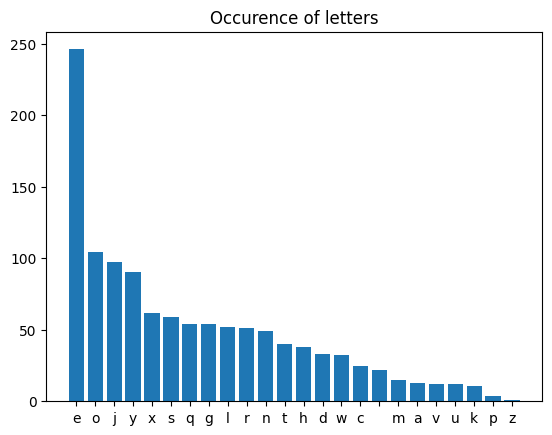

In [5]:
import matplotlib.pyplot as plt

plt.rcdefaults()
import matplotlib.pyplot as plt
from collections import Counter

counter = Counter(ciphertext)
letters, occurences = list(zip(*counter.most_common()))
xs = range(len(letters))

plt.bar(xs, occurences, align="center")
plt.xticks(xs, letters)
plt.title("Occurence of letters")

plt.show()

From the distribution of the letters, we can reasonably assume that 'e' in the ciphertext is ' ' in the plaintext (since spaces will be very common), and 'o' is 'e' (similarly, because 'e' is the most common letter).
From here on, there is no guarantee that the most common letters in the plaintext follows the ranking in that of the English language, though they can still serve as a rough guide as to whether the substitution is reasonable.

Let's see what we have for now.

In [6]:
def sub_with_dict(string, dic, replace_unknowns=True):
    return "".join(
        map(lambda x: dic.get(x, "?" if replace_unknowns else x.upper()), string)
    )


guesses = {"e": " ", "o": "e"}
sub_with_dict(ciphertext, guesses)

'???e???? ???e ???? ?e ??e ????? ?? ????? ???? ?e ? ???? ??e ?????e?? ???? ?? ??e ??e? ??e ??? ??????? ???? ?? ???? ???? ?e? ????e? ??? ?e? ????? ?? ??e ????e ?? ?? ? ?? ?e? ???e?e?? ?e?? ??e ?e??? ????? ?????? ??? ??e? ???? ???? ?????? ?e? ?? ??e ???e? ??? ? ??? ??e ?????? ??????? ????? ???e ?e??e ??? ?? ???e ??? ??? ???? ????? ?e?? ????? ??? ???? ?e?? ?e?? ???? ?? ???? ?? ?? ?? ???? ?? ?ee ?? ????? ????? ???? ?????? ??e ???? ???ee?? ????? ?e?e? ???? ?? ??? ???? ?? ????? ?e?e? ????e ?? ??? ???? ???? ?e? ??? ????e ?? ??????? ?e? ???? ???e ?? ?? ???? ?e? ??? ????e ? ???? ???? ?e? ??e ???? ?? ?e? ???? ??? ??? ???? ?????e?? ?? ???? ???? ???????? ????? ??e?? ??e ???? ??? ? ???? ????e ??? ??e? ??? ?? ?e?? ????e? ????e ?????e? ?? ??? ???? ??? ??? ?e? ???e? ??? ??e ?e?e?? ?e? ?e? ?? ????e? ??????? ?? ??e ???e ?? ??e ???e????e ??????e ??e ??e ?e ????e ?? ?e????? ??e??? ???? ??e ???e?? ?e????? ???? ?? ??? ????? ?? ?e?? ???? ?? ?????? ?? ???e ??? ????? ????? ????? ??e ??? ? ???e ?? ??? ??? ?e?e?

Using the fact that English language have small possible variations for short words, we can try to derive the substituted values for those.

A prime example would be one letter words, since English language primarily only have 'I' and 'a' as one letter words.

So let's see what are the one letter words in the ciphertext.
Note that by our previous substitution, we would have obtain the supposed correct word boundaries.

In [7]:
partial_decrypted = sub_with_dict(
    ciphertext, {**guesses, " ": "_"}, replace_unknowns=False
)
[word for word in partial_decrypted.split() if len(word) == 1]

['R', 'N', 'R', 'S', 'S', 'R', 'S']

All letters that are yet to be decrypted will be in uppercase.

Looks like both 'R' and 'S' are good candidates to be 'a' or 'i'.
Trying one of the substitution.

In [8]:
sub_with_dict(ciphertext, {**guesses, "r": "a", "s": "i"})

'???e???? ???e ???? ?e ??e ????? a? ????i ???? ?e a ia?? ??e ??i??e?? ???? a? ??e ??e? ??e ?i? ????a?? ?a?? ?? ???? ?a?? ?e? ?a??e? i?? ?e? ????? a? ??e ??i?e ?? i? ? ?? ?e? ???e?ei? ?e?? ??e ?ei?? ??i?? ???a?? i?? ??e? ???? ???? ???a?? ?e? ?? ??e ???e? i?? a ?a? ??e ?????? ????a?? ?a??? ?i?e ?e??e ??? ?? ?a?e ??? ??? ???? ??ia? ?e?? ??i?? ??? ???? ?ei? ?e?? ???? ?? ???? ?? ?? ?? ???? ?? ?ee ?? ??i?? ????? ?a?? ?i?a?? ??e ?i?? ???ee?? ????? ?e?e? ???? a? ??? ???? ?? ????? ?e?e? ??a?e a? ??? ???? ???? ?e? ??? ????e i? i????i? ?e? ???? ?i?e ?? ?? ??i? ?e? ??? ????e i ???? ??i? ?e? ??e ???? ?? ?e? ?ia? i?? i?? ??i? ??a??e?? a? ???? ???? ?????a?? ??i?? ??ei? ??e ???? a?? i ???? ??i?e i?? ??e? ?i? a? ?e?? ????e? ????e ?????e? ?? ??? ?ia? ?a? ??? ?e? ???e? ??? ??e ?e?e?? ?e? ?e? ?? ?a??e? ????a?? ?? ??e ???e a? ??e ?i?e??a?e ?a????e ??e a?e ?e ??i?e a? ?e??a?? ??e??? ??a? ??e ?i?e?? ?e??a?? ?i?? ?? ??? ?a??? i? ?e?? ??a? ?? ?????? ?? ?a?e ??? i???? ????? ??i?? ??e ?i? a ?a?e a? i?? a?? ?e?e?

This doesn't look quite right.
There is a word that is `ia??`, which is rather unlikely to be an English word.
We now try the other permutation of the substitution.

In [9]:
sub_with_dict(ciphertext, {**guesses, "r": "i", "s": "a"})

'???e???? ???e ???? ?e ??e ????? i? ????a ???? ?e i ai?? ??e ??a??e?? ???? i? ??e ??e? ??e ?a? ????i?? ?i?? ?? ???? ?i?? ?e? ?i??e? a?? ?e? ????? i? ??e ??a?e ?? a? ? ?? ?e? ???e?ea? ?e?? ??e ?ea?? ??a?? ???i?? a?? ??e? ???? ???? ???i?? ?e? ?? ??e ???e? a?? i ?i? ??e ?????? ????i?? ?i??? ?a?e ?e??e ??? ?? ?i?e ??? ??? ???? ??ai? ?e?? ??a?? ??? ???? ?ea? ?e?? ???? ?? ???? ?? ?? ?? ???? ?? ?ee ?? ??a?? ????? ?i?? ?a?i?? ??e ?a?? ???ee?? ????? ?e?e? ???? i? ??? ???? ?? ????? ?e?e? ??i?e i? ??? ???? ???? ?e? ??? ????e a? a????a? ?e? ???? ?a?e ?? ?? ??a? ?e? ??? ????e a ???? ??a? ?e? ??e ???? ?? ?e? ?ai? a?? a?? ??a? ??i??e?? i? ???? ???? ?????i?? ??a?? ??ea? ??e ???? i?? a ???? ??a?e a?? ??e? ?a? i? ?e?? ????e? ????e ?????e? ?? ??? ?ai? ?i? ??? ?e? ???e? ??? ??e ?e?e?? ?e? ?e? ?? ?i??e? ????i?? ?? ??e ???e i? ??e ?a?e??i?e ?i????e ??e i?e ?e ??a?e i? ?e??i?? ??e??? ??i? ??e ?a?e?? ?e??i?? ?a?? ?? ??? ?i??? a? ?e?? ??i? ?? ?????? ?? ?i?e ??? a???? ????? ??a?? ??e ?a? i ?i?e i? a?? i?? ?e?e?

This looks more likely to be correct.
Next, we can work on the two letter words.

In [10]:
guesses = {**guesses, "r": "i", "s": "a"}
partial_decrypted = sub_with_dict(
    ciphertext, {**guesses, " ": "_"}, replace_unknowns=False
)
print(Counter([word for word in partial_decrypted.split() if len(word) == 2]))

Counter({'YX': 6, 'JY': 5, 'iQ': 4, 'QY': 4, 'iX': 3, 'aX': 3, 'TY': 3, '_e': 2, 'YU': 2, 'iU': 2, 'iJ': 2, 'HY': 1, 'WK': 1, 'MD': 1, 'Ce': 1, 'aQ': 1, '_D': 1})


Notice that `_e` and `Ce` are 2 letter words that ends with 'e'.
The common words are `be`, `me` and `we`, so these seems like good candidates for substitutions.

In [11]:
guesses = {**guesses, "c": "w", " ": "m"}
sub_with_dict(ciphertext, guesses)

'??me???? ???e ???? me ??e w???? i? ????a ???? me i ai?? ??e ??a??e?? ???? i? ??e ??e? ??e wa? ????i?? ?i?? ?? ??m? wi?? ?e? ?i??e? a?? ?e? ???m? i? ??e ??a?e ?? a? ? ?? ?e? ???e?ea? we?? ??e ?ea?? ??a?? ??mi?? a?? ??e? ???? ???? ??mi?? ?e? ?? ??e ???e? a?? i ?i? ??e ?????? ????i?? ?i??? ma?e ?e??e ??? ?? ?i?e ??? ??? ???? ??ai? ?e?? ?ma?? ??? ???? ?ea? ?e?? ??m? ?? m??? ?? ?? ?? m??? ?? ?ee ?? w?a?? w???? wi?? ?a?i?? ??e ?a?? ???ee?? ????? ?e?e? ???w i? ??? ???? ?? ????? ?e?e? ??i?e i? ??? ???? ???w ?e? ??w ????e a? a????a? ?e? ???? ?ame ?? ?? ??a? ?e? ??w ????e a ???? ??a? ?e? ??e ???w ?? ?e? ?ai? a?? a?? ??a? ??i??e?? i? ???? ???? ?????i?? ??a?? ??ea? ??e m??? i?? a ???? ??a?e a?? ??e? ?a? i? ?e?? ????e? ????e ?????e? ?? ??w wai? ?i? ??? ?e? ???e? ??? ??e me?e?? me? ?e? ?? ?i??e? ????i?? ?? ??e ???e i? ??e ?a?e??i?e ?i????e ??e i?e we ??a?e i? ?e??i?? ??e??? ??i? ??e wa?e?? ?e??i?? wa?m ?? ??? mi??? a? we?? ?wim m? w????? ?? ?i?e ??w a???? ????? ??a?? ??e wa? i ?i?e i? a?? i?? ?e?e?

Next, the `iQ`, `iX`, `iU`, `iJ` could be `is`, `in`, `it`, `if` in plaintext, thus we can try those also.

In [12]:
guesses = {**guesses, "q": "s", "x": "n", "u": "f", "j": "t"}
sub_with_dict(ciphertext, guesses, replace_unknowns=False)

'sYmeMYHD YnAe tYNH me tLe wYGNH is TYnna GYNN me i aint tLe sLaGKest tYYN in tLe sLeH sLe was NYYVinT VinH Yf HWmM witL LeG finTeG anH LeG tLWmM in tLe sLaKe Yf an N Yn LeG fYGeLeaH weNN tLe DeaGs staGt AYminT anH tLeD HYnt stYK AYminT feH tY tLe GWNes anH i Lit tLe TGYWnH GWnninT HiHnt maVe sense nYt tY NiPe fYG fWn DYWG MGain Tets smaGt MWt DYWG LeaH Tets HWmM sY mWAL tY HY sY mWAL tY see sY wLats wGYnT witL taVinT tLe MaAV stGeets DYWNN nePeG VnYw if DYW HYnt TY DYWNN nePeG sLine if DYW HYnt TNYw LeD nYw DYWGe an aNNstaG Tet DYWG Tame Yn TY KNaD LeD nYw DYWGe a GYAV staG Tet tLe sLYw Yn Tet KaiH anH aNN tLat TNitteGs is TYNH YnND sLYYtinT staGs MGeaV tLe mYNH its a AYYN KNaAe anH tLeD saD it Tets AYNHeG DYWGe MWnHNeH WK nYw wait tiN DYW Tet YNHeG MWt tLe meteYG men MeT tY HiffeG ZWHTinT MD tLe LYNe in tLe sateNNite KiAtWGe tLe iAe we sVate is TettinT KGettD tLin tLe wateGs TettinT waGm sY DYW miTLt as weNN swim mD wYGNHs Yn fiGe LYw aMYWt DYWGs tLats tLe waD i NiVe it anH iNN nePeG

From here, we can derive many of the words (assuming all our previous substitutions were correct, which seems likely since the partially decrypted message seems reasonable).

For example, we can deduce that `tLe` is probably `the`, `sateNNite` is probably `satellite`, `Yf` is `of` (since "i" is already decrypted).

In [13]:
guesses = {**guesses, "l": "h", "n": "l", "y": "o"}
sub_with_dict(ciphertext, guesses)

'some?o?? on?e tol? me the wo?l? is ?onna ?oll me i aint the sha??est tool in the she? she was loo?in? ?in? of ??m? with he? fin?e? an? he? th?m? in the sha?e of an l on he? fo?ehea? well the ?ea?s sta?t ?omin? an? the? ?ont sto? ?omin? fe? to the ??les an? i hit the ??o?n? ??nnin? ?i?nt ma?e sense not to li?e fo? f?n ?o?? ??ain ?ets sma?t ??t ?o?? hea? ?ets ??m? so m??h to ?o so m??h to see so whats w?on? with ta?in? the ?a?? st?eets ?o?ll ne?e? ?now if ?o? ?ont ?o ?o?ll ne?e? shine if ?o? ?ont ?low he? now ?o??e an allsta? ?et ?o?? ?ame on ?o ?la? he? now ?o??e a ?o?? sta? ?et the show on ?et ?ai? an? all that ?litte?s is ?ol? onl? shootin? sta?s ??ea? the mol? its a ?ool ?la?e an? the? sa? it ?ets ?ol?e? ?o??e ??n?le? ?? now wait til ?o? ?et ol?e? ??t the meteo? men ?e? to ?iffe? ????in? ?? the hole in the satellite ?i?t??e the i?e we s?ate is ?ettin? ??ett? thin the wate?s ?ettin? wa?m so ?o? mi?ht as well swim m? wo?l?s on fi?e how a?o?t ?o??s thats the wa? i li?e it an? ill ne?e?

From here, decrypting the rest of the message is trivial, and left as exercise for the reader.

Thus, we have shown that by using frequency analysis and the assumption that the plaintext is in English, we can overcome the substitution cipher.

### Shift Ciphers

Key: A number which tells us how many letters down the alphabet each letter is shifted.


Process: Each letter is shifted a number of positions down.
If the position extends past the 26th position (letter 'Z'), it is wrapped back to 1st position (letter 'A').
Then, the ciphertext contains the letters belonging to the corresponding shifted positions.

Key Space Size: 26 (assuming space is not shifted)

Examples include:
* Caeser ciphers: Uses a shift of 3
* ROT13: Uses a shift of 13
    * Has an additional property that the decryption algorithm is the same as encryption, assuming the domain is only the 26 letters.

In [14]:
from module.classical_cipher import ShiftCipher

show_implementation(ShiftCipher)

class ShiftCipher:
    def __init__(self, key):
        self.domain = ascii_lowercase
        self.key = key
        
    def __repr__(self):
        return f'ShiftCipher(shift={self.key})'
    
    def encrypt(self, message):
        indices = map(lambda x: Optional.from_func(lambda: self.domain.index(x)), message)
        shift = lambda opt: (opt + self.key) % len(self.domain)
        shifted_indices = Optional.map_over(shift, indices)
        encrypted = Optional.map_over(lambda opt: self.domain[opt], shifted_indices)
        return ''.join(map(lambda elem: 
                           elem[1].value
                           if not elem[1].isEmpty
                           else elem[0], 
                           zip(message, encrypted)))
        
    def decrypt(self, message):
        indices = map(lambda x: Optional.from_func(lambda: self.domain.index(x)), message)
        shift = lambda opt: (opt + len(self.domain) - self.key) % len(self.domain)
        shifted_indices = Optio

In [15]:
plaintext = "hello world"
caeser_cipher = ShiftCipher(3)

demonstrate_cipher(caeser_cipher, plaintext)

ShiftCipher(shift=3)

Plaintext:                          hello world
Ciphertext/Encrypted plaintext:     khoor zruog
Decrypted "khoor zruog":            hello world


#### Behaviours against attacks
Since shift ciphers are a subset of substitution cipher, it shares the same weaknesses against the same attacks on substitution ciphers.

##### Bruteforce attacks
Because of the small keyspace, shift ciphers are also vulnerable to bruteforce attacks.

Suppose we have the following ciphertext encrypted with a shift cipher.

In [16]:
ciphertext = "brx dv zhoo euxwxv"

It is trivial to bruteforce this by testing each shift and check if the output is reasonable.

In [17]:
for i in range(26):
    shift_cipher = ShiftCipher(i)
    print(shift_cipher.decrypt(ciphertext))

brx dv zhoo euxwxv
aqw cu ygnn dtwvwu
zpv bt xfmm csvuvt
you as well brutus
xnt zr vdkk aqtstr
wms yq ucjj zpsrsq
vlr xp tbii yorqrp
ukq wo sahh xnqpqo
tjp vn rzgg wmpopn
sio um qyff vlonom
rhn tl pxee uknmnl
qgm sk owdd tjmlmk
pfl rj nvcc silklj
oek qi mubb rhkjki
ndj ph ltaa qgjijh
mci og kszz pfihig
lbh nf jryy oehghf
kag me iqxx ndgfge
jzf ld hpww mcfefd
iye kc govv lbedec
hxd jb fnuu kadcdb
gwc ia emtt jzcbca
fvb hz dlss iybabz
eua gy ckrr hxazay
dtz fx bjqq gwzyzx
csy ew aipp fvyxyw


From the list, we can see that the 3rd entry is the only reasonable output, thus the shift amount is 3.

### Vigenere Ciphers

Key: A keyword of any length.

Keyspace: $26^\text{length of key}$. 
Since there is no limit to the length of the key (except it is at most the length of the plaintext), it is potentially infinite.

Process: 
1. Convert each letter in the keyword into positions. (A = 0, Z = 25)
2. Align in keyword with the message, and shift each letter in the message by the amount according to the keyword
3. If every letter in the keyword is used, repeat the keyword again from the start
4. Repeat until every letter in the plaintext is encrypted

Suppose that our plaintext is 'hello world' and the keyword is 'robot'.

It is a **polyalphabetic** cipher, meaning different occurences of the same letter in the plaintext is **not always** mapped to the letter in the ciphertext.

In [18]:
from module.classical_cipher import VigenereCipher

show_implementation(VigenereCipher)

class VigenereCipher:
    def __init__(self, keyword):
        self.domain = ascii_lowercase
        self.key = keyword
        
    def __repr__(self):
        return f'ViginereCipher(keyword={self.key})'
    
    def encrypt(self, message):
        indices = map(lambda x: Optional.from_func(lambda: self.domain.index(x)), message)
        shift_amounts = islice(cycle(map(lambda x: self.domain.index(x), self.key)), len(message))
        shifts = map(lambda amt: lambda opt: (opt + amt) % len(self.domain), shift_amounts)
        shifted_indices = Optional.zip_with(shifts, indices)
        encrypted = Optional.map_over(lambda opt: self.domain[opt], shifted_indices)
        return ''.join(map(lambda elem: 
                           elem[1].value
                           if not elem[1].isEmpty
                           else elem[0], 
                           zip(message, encrypted)))
        
    def decrypt(self, message):
        indices = map(lambda x: Optional.from_func(lambda: se

In [19]:
from string import ascii_lowercase

key = "robot"
plaintext = "hello world"
vigenere_cipher = VigenereCipher(key)

demonstrate_cipher(vigenere_cipher, plaintext)

ViginereCipher(keyword=robot)

Plaintext:                          hello world
Ciphertext/Encrypted plaintext:     ysmzh kpfeu
Decrypted "ysmzh kpfeu":            hello world


#### Behaviours against attacks

##### Known plaintext attacks
If the attacker knows the plaintext and the corresponding ciphertext, they can recover the keyword by computing the shift amounts and look for the repeat.

##### Ciphertext only attacks
Suppose that the key is length $n$.
Notice this means that the same letter in the keyword is repeated every $n^{th}$ letter, thus each $n^{th}$ letter in the plaintext is shifted by the same amount.
Thus, if we look at every $n^{th}$ letter, we can treat this as a traditional shift cipher and thus can recover the key.

To determine the length of the key, we can use the **Kasiski method**

###### Kasiski Method
Kasiski method is based on the assumption that repeating patterns of letters in the ciphertext is likely due to the keyword being in the same position as some frequently occurring words.
For example, since 'the' appears frequently in the plaintext, it is likely that the 'the's in multiple location of the plaintext are encoded using the keyword in the same alignment, leading to repeats of three-letter words in the ciphertext.
Using the length of the repeats, we can guess the possible length of the keyword, as it must be a factor of the repeat length (if repeated sequence is the same word in plaintext).


### Permutation/Transposition cipher
Key: $(p_1, p_2, \dots, p_t)$, where the $i^{th}$ item in the block is moved to the $p_i^{th}$ location in the ciphertext.

Process: groups $t$ characters in the plaintext into blocks, then shuffles the characters in the blocks into a fixed permutation.

Keyspace: $t!$

Since there is no substitution taking place, the cipher does not have a fixed domain space, thus can work on any types of strings without modification.
Contrast this with substitution ciphers, which only works if the characters it is encrypting is accounted for in its substitution table.

In [20]:
from module.classical_cipher import PermutationCipher

show_implementation(PermutationCipher)

class PermutationCipher:
    def __init__(self, permutation, padding='|'):
        self.key = permutation
        self.padding = padding
        
    def __repr__(self):
        return f'PermutationCipher(permutation={self.key})'
 
    def _pad(self, message):
        padding_size = len(self.key) - len(message) % len(self.key)
        return message + padding_size * self.padding
    
    def _unpad(self, message):
        return message.strip(self.padding)
    
    def encrypt(self, message):
        padded_message = self._pad(message)
        
        blocks = [padded_message[i:i+len(self.key)] for i in range(0, len(message), len(self.key))]
        shuffled_blocks = [[block[self.key.index(i)] for i in range(len(self.key))] for block in blocks]
        
        return ''.join([''.join(block) for block in shuffled_blocks])
        
    def decrypt(self, message):        
        blocks = [message[i:i+len(self.key)] for i in range(0, len(message), len(self.key))]
        shuffled_blocks

In [21]:
plaintext = "richard of yolk gain battle in vain"
key = (2, 1, 3, 0)
permutation_cipher = PermutationCipher(key)

demonstrate_cipher(permutation_cipher, plaintext)

PermutationCipher(permutation=(2, 1, 3, 0))

Plaintext:                          richard of yolk gain battle in vain
Ciphertext/Encrypted plaintext:     hirc radyfo  loknagitb a ltevni |ian
Decrypted "ciphertext":             richard of yolk gain battle in vain


#### Behaviours against attacks

##### Known plaintext attacks
Similar to substitution ciphers, if the attacker knows the plaintext and the corresponding ciphertext, they can recover the permutation by comparing the plaintext and the ciphertext.

##### Ciphertext only attacks
Permutation ciphers are also easily cracked, especially if the plaintext is in English.
Even from the above example, it is not hard to decode the ciphertext without knowing the permutation beforehand.

### One-time pad
Key: An endless, seemingly random, stream of pre-negotiated bits.

Process: Take each bit in the message and perform an XOR operation on it with a bit from the stream.
Notice that since we are performing XOR, we work on bits instead of characters.
However, a nice parallel for a "classical one time pad" would be a stream of random numbers that both parties agreed on, and each character in the message is processed using a shift cipher, shifting by the corresponding number from the stream for encryption and decryption.

Keyspace: Infinite, because the stream is endless

Note that since XOR operation is self-inversive, the receiver simply needs to XOR the ciphertext with the same bits in the bitstream.

In [22]:
from module.classical_cipher import OneTimePad

show_implementation(OneTimePad)

class OneTimePad:
    def __init__(self, bitstream):
        self.bitstream = bitstream
        
    def __repr__(self):
        return f'OneTimePad(bitstream={self.bitstream})'
     
    def encrypt(self, message_bytes):
        assert len(message_bytes) <= len(self.bitstream)
        random_bytes = self.bitstream[:len(message_bytes)]
        cipher_bytes = bytes(message_byte ^ random_byte for message_byte, random_byte in zip(message_bytes, random_bytes))
        
        self.bitstream = self.bitstream[len(message_bytes):]
        return cipher_bytes
        
    def decrypt(self, message):        
        return self.encrypt(message) 


In [23]:
bitstream = b"2V94x.'^**;;U \"WZ\\IdZ,R*D+cb--{9C*..P) \t(T!YQl})*; N{JQZNtCr1_`-w3\nF9XhL%N7k5C\x0c\r"
plaintext = b"richard of yolk gain battle in vain"
sender_otp = OneTimePad(bitstream)
receiver_otp = OneTimePad(bitstream)

print(sender_otp, receiver_otp)
print()
print("Plaintext:".ljust(35), plaintext)
ciphertext = sender_otp.encrypt(plaintext)

print("Ciphertext/Encrypted plaintext:".ljust(35), ciphertext)

decrypted_ciphertext = receiver_otp.decrypt(ciphertext)
print("Decrypted ciphertext:".ljust(35), decrypted_ciphertext)
sender_otp

OneTimePad(bitstream=b'2V94x.\'^**;;U "WZ\\IdZ,R*D+cb--{9C*..P) \t(T!YQl})*; N{JQZNtCr1_`-w3\nF9XhL%N7k5C\x0c\r') OneTimePad(bitstream=b'2V94x.\'^**;;U "WZ\\IdZ,R*D+cb--{9C*..P) \t(T!YQl})*; N{JQZNtCr1_`-w3\nF9XhL%N7k5C\x0c\r')

Plaintext:                          b'richard of yolk gain battle in vain'
Ciphertext/Encrypted plaintext:     b'@?Z\\\x19\\C~EL\x1bB:LIw== \nzN3^0G\x06BDC[O"C@'
Decrypted ciphertext:               b'richard of yolk gain battle in vain'


OneTimePad(bitstream=b'.P) \t(T!YQl})*; N{JQZNtCr1_`-w3\nF9XhL%N7k5C\x0c\r')

Notice that this time, we do not use the same cipher object to both encrypt and decrypt, because after using the bit in the bitstream, it is discarded and thus cannot be recovered for decryption.
Thus, we need a separate sender and receiver ciphers whose bitstream are aligned with each other.
And because the used bits are discarded, when we encrypt the message a second time, the resultant ciphertext is different from the first, despite using the same cipher again.

In [24]:
print("2nd Plaintext:".ljust(35), plaintext)
ciphertext = sender_otp.encrypt(plaintext)

print("2nd Ciphertext/Encrypted plaintext:".ljust(35), ciphertext)

decrypted_ciphertext = receiver_otp.decrypt(ciphertext)
print("2nd Decrypted ciphertext:".ljust(35), decrypted_ciphertext)

2nd Plaintext:                      b'richard of yolk gain battle in vain'
2nd Ciphertext/Encrypted plaintext: b"\\9JHhZ0\x0167L\x04FFP\x00)\x1a#?z,\x157\x06]:@D\x19\x13|'P6"
2nd Decrypted ciphertext:           b'richard of yolk gain battle in vain'


Secondly, since we are XOR-ing against the ASCII message, there is no guarantee that the resultant bytes is still valid ASCII.
Hence, we are working on the message bytes instead, instead of characters.

#### Behaviours against attacks

##### Known plaintext attacks
Just like the previous ciphers, if the attacker knows the plaintext, ciphertext pair, they can decode the bits used to encrypt the message.

However, since the bits are discarded after being used, this information has no value to the attacker since they cannot use it to decrypt further messages.

##### Ciphertext only attacks
By the same argument as above, there is no known ciphertext only attack on the one time pad.

#### Perfect secrecy
Because the one time pad leaks no additional information of the plaintext (it only leaks the length of the message), it is known that it achieve **perfect secrecy**.

A way to reason this is the following:

Suppose we have the plaintext message $P_1$ of `hello world`.

After encryption with the one time pad using bitstream of $B_1$, suppose that the cipher text is `fwadslpodsx`.

Now suppose that we have another plaintext message $P_2$ of `mumbo jumbo`

Since we know that there is no limitation on the bitstream of the one time pad, we know that there must exists some one time pad that uses bitstream $B_2$ which encrypts `mumbo jumbo` into `fwadslpodsx` also.

From the attackers perspective, without knowing the bitstream beforehand, they cannot ascertain which is the original plaintext in the ciphertext, between `hello world`, `mumbo jumbo` and even `buzzphrases` that was encrypted using some bitstream $B_3$.
Therefore, the attackers have no means of extracting information from the ciphertext.

Hence, this gives some perspective to the perfect secrecy of one time pads.


#### Notes
Notice that the bitstream must be as long as the message.
This means that we have to store copies of the long bitstream on both the sender and receiver side.
Hence, it may be unwieldy to setup, especially if the same cipher needs to be used for encryption of many messages.

Secondly, even though it is unbreakable, it can still fail if user reuses the keys, such as in the case of ["The Venona Story"](https://en.wikipedia.org/wiki/Venona_project#Decryption).